Problem Statement



The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.


 features info 
 
 The table results from a query which joins two tables (actuaclly views): "PhotoObj" which contains photometric data and "SpecObj" which contains spectral data.
 
View "PhotoObj" :

objid = Object Identifier
ra = J2000 Right Ascension (r-band)
dec = J2000 Declination (r-band)
u = better of DeV/Exp magnitude fit
g = better of DeV/Exp magnitude fit
r = better of DeV/Exp magnitude fit
i = better of DeV/Exp magnitude fit
z = better of DeV/Exp magnitude fit
run = Run Number
rereun = Rerun Number
camcol = Camera column
field = Field number


View "SpecObj"
specobjid = Object Identifier
class = object class (galaxy, star or quasar object)
redshift = Final Redshift
plate = plate number
mjd = MJD of observation
fiberid = fiber ID




In [1]:
#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
Data=pd.read_csv('Skyserver.txt')
Data


,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [3]:
Data.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [4]:
Data.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [5]:
# Lets Check Outliers in the Dataset 
# IQR score technique to remove Outliers 
Q1 = Data.quantile(0.25)
Q3 = Data.quantile(0.75)
IQR = Q3 - Q1
print(IQR.shape)
Data = Data[~((Data < (Q1-1.5 * IQR)) |(Data > (Q3 + 1.5 * IQR))).any(axis=1)]
Data.shape


(17,)


(7978, 18)

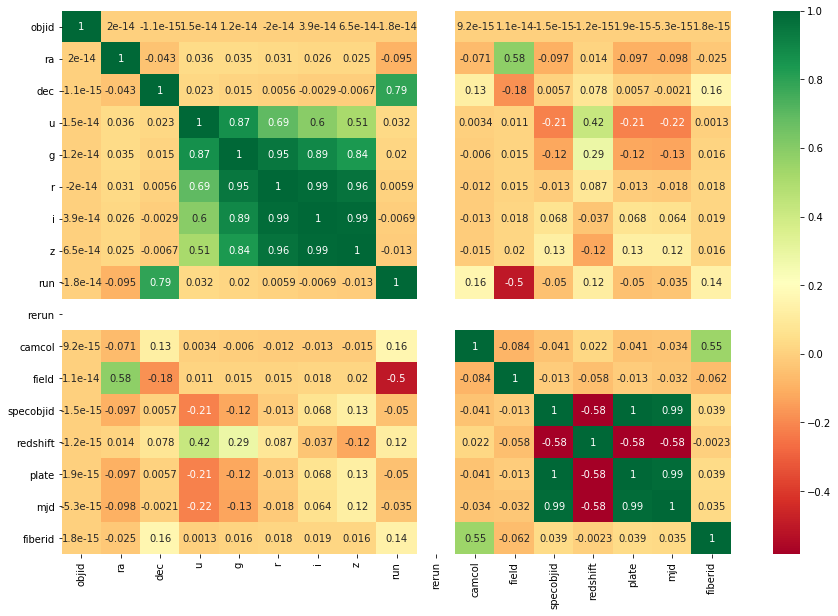

In [6]:
# Correlation of EmpData
plt.figure(figsize=(15,10))
sns.heatmap(data=Data.corr(),annot=True,cmap="RdYlGn")

In [7]:
Data.skew()

objid        0.000000
ra           0.237568
dec          1.262652
u           -0.845928
g           -0.577114
r           -0.276244
i           -0.104173
z            0.024907
run          0.570086
rerun        0.000000
camcol      -0.129838
field        0.172718
specobjid    1.042591
redshift     0.608667
plate        1.042584
mjd          0.915484
fiberid      0.068206
dtype: float64

In [8]:
Data.keys()

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [9]:
# Label Encoding for Object Column workclass marital-status ,occupation ,race ,relationship, native-country,50K
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Data['class'] = labelencoder.fit_transform(Data['class'])

In [10]:
x=Data.drop(['class'],axis=1)

In [11]:
y=Data['class']
y=np.array(y).reshape(-1,1)

In [12]:
print(x.shape)
print(y.shape)

(7978, 17)
(7978, 1)


In [13]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.22,random_state=42)
# default random random_state=42


In [14]:
# using maxr2_score function will findout random_state

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

def maxr2_score(regr,x,y):
    max_r_score=0
    final_r_state=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
#         print("r2 score corresponding to",r_state," is " ,r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to",final_r_state," is ",max_r_score)
    return final_r_state

In [15]:
# Define the Classification Model

In [18]:
# import Libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

from sklearn.ensemble import RandomForestClassifier
#  Cross Validation Libraries 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

KNN=KNeighborsClassifier(n_neighbors=6)
sv=LinearSVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)


In [19]:
models=[]
models.append(("KNeighborsClassifier",KNN))
models.append(("DecisionTreeClassifier",DT))
# models.append(("RandomForestClassifier",Rf))


In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.preprocessing import StandardScaler
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('***********',name,'************')
    print('\n')
    r_state=maxr2_score(model,x,y)
    print('\n')
    print('random state value =',r_state)
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
      
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score= ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_Val_Score=',sc)
    cvs.append(sc*100)
    print('\n')
    
    print('classification_report\n',classification_report(y_test,pre))
      
    print('\n\n')
     


*********** KNeighborsClassifier ************


max r2 score corresponding to 70  is  0.5265967965196757


random state value = 70
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')


Accuracy_score=  0.876993166287016


Cross_Val_Score= 0.8504923280679701


classification_report
               precision    recall  f1-score   support

           0       0.85      0.97      0.90      1031
           1       0.00      0.00      0.00        14
           2       0.94      0.77      0.84       711

   micro avg       0.88      0.88      0.88      1756
   macro avg       0.59      0.58      0.58      1756
weighted avg       0.88      0.88      0.87      1756




*********** DecisionTreeClassifier ************


max r2 score corresponding to 94  is  0.9903699910578488


random state value = 94
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
         

In [21]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_Score':cvs})
result

,Model,Accuracy_score,Cross_val_Score
0,KNeighborsClassifier,87.699317,85.049233
1,DecisionTreeClassifier,99.259681,98.734051


In [22]:
# Saving the Model with MAX Accuracy score value 
from sklearn.externals import joblib
joblib.dump(DT,'Skyserver_Model.obj')
OuModel=joblib.load('Skyserver_Model.obj')


# Conclusion
    Preparing the classification model for   star, galaxy or quasar.
    we have been applied IQR score technique to remove Outliers
    **Need to apply more classifier and handle multi class roc curve  **
    DecisionTreeClassifier Model has been achived max performance
